<a href="https://colab.research.google.com/github/AlineEmmer/MachineLearning/blob/main/GBC_SHAP_VALUES__Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisando as variáveis importantes via SHAP values: PARTE 1**

In [ ]:
## Step 1: import and view the pre-treated database
## step 2: Defining the predictor and response variables
## Step 3: splitting training and testing data
## Step 4: Training the Top 5 machine learning models
## Step 5: Installing SHAP VALUES
## Step 6: Shap Values
## Step 7: Comparison of important features

##**Step 1: Importing and viewing the pre-treated database**

In [ ]:
### Importando o dataset

from google.colab import files
uploaded = files.upload()

Saving Diabetes_ML1800_1400.xlsx to Diabetes_ML1800_1400.xlsx


In [ ]:
### Visualizando o dataset importado

import pandas as pd
df = pd.read_excel("Diabetes_ML1800_1400.xlsx")
display (df.head())

,Classes,1800,1799.4,1798,1796.6,1795.2,1793.8,1792.3,1790.9,1789.5,...,1412.6,1411.2,1409.8,1408.4,1407,1405.5,1404.1,1402.7,1401.3,1400
0,0,0.9884,0.9881,0.9881,0.9881,0.9880,0.9872,0.9858,0.9850,0.9855,...,0.9209,0.9207,0.9202,0.9196,0.9188,0.9179,0.9175,0.9176,0.9174,0.9163
1,0,0.9886,0.9881,0.9880,0.9882,0.9882,0.9875,0.9861,0.9854,0.9861,...,0.9156,0.9153,0.9147,0.9139,0.9128,0.9115,0.9109,0.9108,0.9104,0.9093
2,0,0.9889,0.9885,0.9883,0.9882,0.9877,0.9867,0.9853,0.9847,0.9856,...,0.9205,0.9203,0.9199,0.9193,0.9184,0.9174,0.9169,0.9168,0.9165,0.9156
3,0,0.9883,0.9880,0.9880,0.9881,0.9880,0.9872,0.9857,0.9849,0.9855,...,0.9197,0.9196,0.9193,0.9187,0.9178,0.9167,0.9161,0.9159,0.9155,0.9143
4,0,0.9887,0.9882,0.9880,0.9881,0.9880,0.9873,0.9859,0.9851,0.9855,...,0.9188,0.9186,0.9182,0.9177,0.9168,0.9158,0.9153,0.9153,0.9148,0.9136


##**Step 2: Defining the predictor and response variables**



In [ ]:
x = df.drop("Classes", axis = 1)
y = df["Classes"]

In [ ]:
x

,1800.0,1799.4,1798.0,1796.6,1795.2,1793.8,1792.3,1790.9,1789.5,1788.1,...,1412.6,1411.2,1409.8,1408.4,1407.0,1405.5,1404.1,1402.7,1401.3,1400.0
0,0.9884,0.9881,0.9881,0.9881,0.9880,0.9872,0.9858,0.9850,0.9855,0.9863,...,0.9209,0.9207,0.9202,0.9196,0.9188,0.9179,0.9175,0.9176,0.9174,0.9163
1,0.9886,0.9881,0.9880,0.9882,0.9882,0.9875,0.9861,0.9854,0.9861,0.9869,...,0.9156,0.9153,0.9147,0.9139,0.9128,0.9115,0.9109,0.9108,0.9104,0.9093
2,0.9889,0.9885,0.9883,0.9882,0.9877,0.9867,0.9853,0.9847,0.9856,0.9866,...,0.9205,0.9203,0.9199,0.9193,0.9184,0.9174,0.9169,0.9168,0.9165,0.9156
3,0.9883,0.9880,0.9880,0.9881,0.9880,0.9872,0.9857,0.9849,0.9855,0.9865,...,0.9197,0.9196,0.9193,0.9187,0.9178,0.9167,0.9161,0.9159,0.9155,0.9143
4,0.9887,0.9882,0.9880,0.9881,0.9880,0.9873,0.9859,0.9851,0.9855,0.9863,...,0.9188,0.9186,0.9182,0.9177,0.9168,0.9158,0.9153,0.9153,0.9148,0.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.9648,0.9645,0.9642,0.9639,0.9634,0.9630,0.9627,0.9625,0.9625,0.9623,...,0.8995,0.8993,0.8990,0.8987,0.8984,0.8981,0.8978,0.8975,0.8972,0.8969
596,0.9651,0.9647,0.9643,0.9638,0.9634,0.9629,0.9625,0.9624,0.9625,0.9624,...,0.8989,0.8988,0.8987,0.8985,0.8982,0.8978,0.8973,0.8969,0.8965,0.8960
597,0.9644,0.9642,0.9639,0.9636,0.9633,0.9630,0.9627,0.9626,0.9626,0.9623,...,0.8986,0.8985,0.8982,0.8979,0.8976,0.8972,0.8968,0.8963,0.8959,0.8956
598,0.9648,0.9642,0.9637,0.9633,0.9630,0.9628,0.9628,0.9628,0.9625,0.9621,...,0.8984,0.8983,0.8980,0.8977,0.8973,0.8969,0.8965,0.8962,0.8959,0.8955


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    2
596    2
597    2
598    2
599    2
Name: Classes, Length: 600, dtype: int64

##**Step 3: Splitting training and testing data**

In [ ]:
###  Importando pacotes de visualização dos resultados dos modelos de machine learning
import seaborn as sns


# Importando pacotes para a divisão dos dados de treinamento e de teste
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=100)

x_treino1, x_val, y_treino1, y_val = train_test_split(x_treino, y_treino, test_size=0.20, random_state=102)

##**Step 4: Training the top 3 machine learning models**

In [ ]:
## TOP 2: Gradient Boost Classifier
# Treinando o modelo

from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_treino, y_treino)


GradientBoostingClassifier()

##**Step 5: Installing and importing SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Para calcular valores SHAP para o modelo, precisamos criar um objeto "Explainer"
# o objeto Explainer será usado  para avaliar uma amostra ou o conjunto de dados completo

# Importando o SHAP
import shap

# Ajuste do explainer
explainer = shap.Explainer(model_gbc.predict, x_val, max_evals=5100)
# Calculando o SHAP values - demora um pouco
shap_values = explainer(x_val)

PermutationExplainer explainer: 97it [07:12,  4.55s/it]


In [ ]:
# Se quisermos simplesmente as importâncias das features conforme determinado pelo algoritmo SHAP,
# precisamos obter o valor médio médio de cada features
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

##**Step 6: Visualizing and saving the SHAP plots**

O gráfico acima, os descritores (features) são ordenados do maior para o menor efeito na previsão. Ele leva em consideração o valor SHAP absoluto, portanto, não importa se a feature afeta a previsão de forma positiva ou negativa.

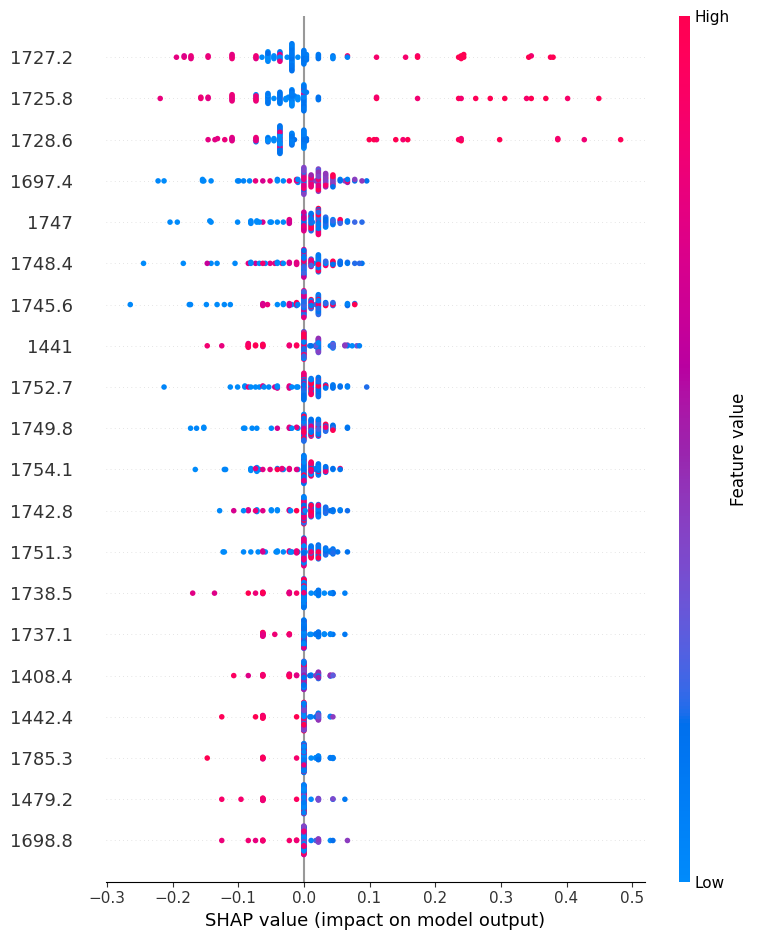

In [ ]:
# Gráfico de resumo da importancia das features: OPÇÃO 1
shap.summary_plot(shap_values)

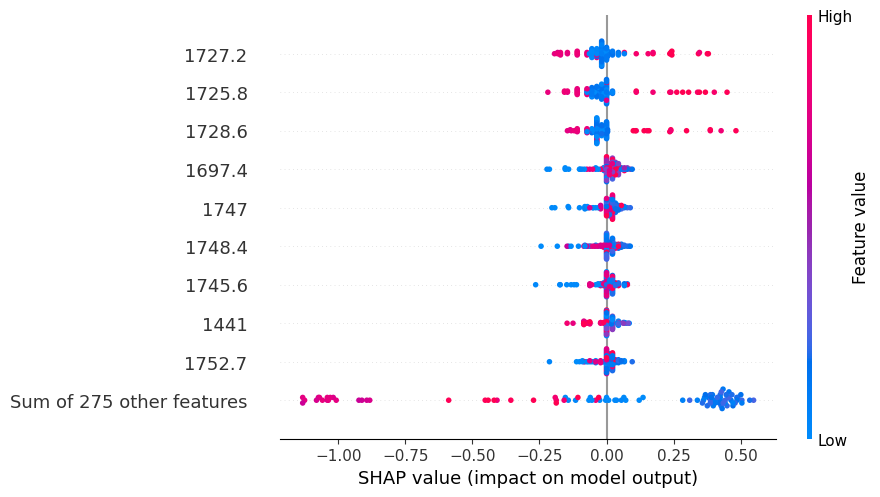

In [ ]:
# Gráfico de resumo da importáncia das features: OPÇÃO 2
shap.plots.beeswarm(shap_values)

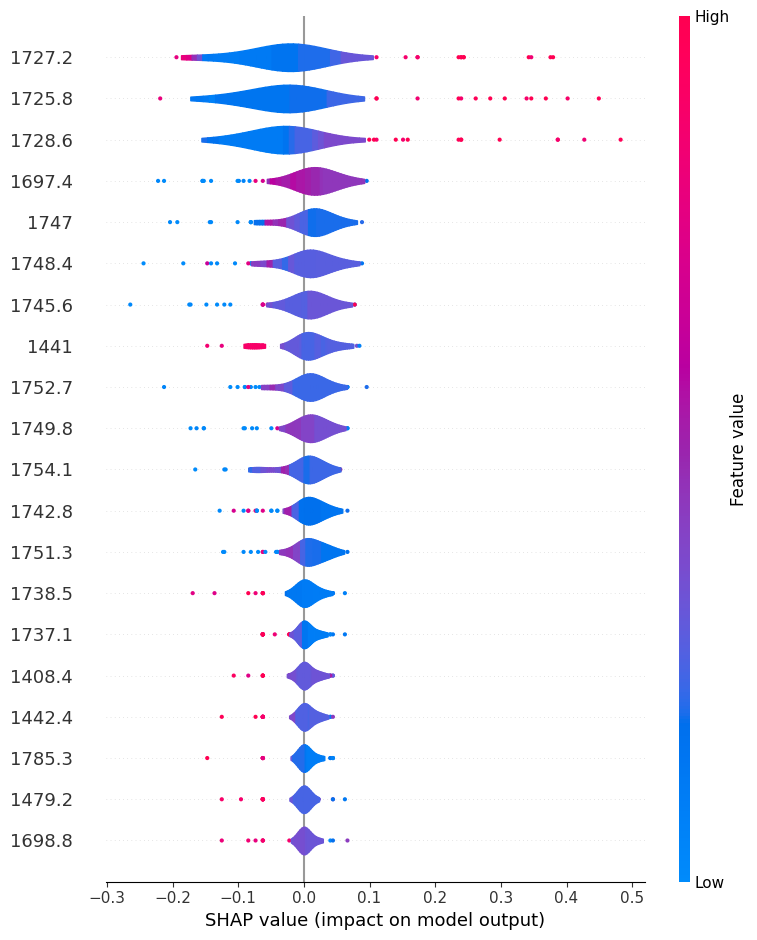

In [ ]:
# Gráfico de resumo da importáncia das features: OPÇÃO 3
shap.summary_plot(shap_values, plot_type='violin')

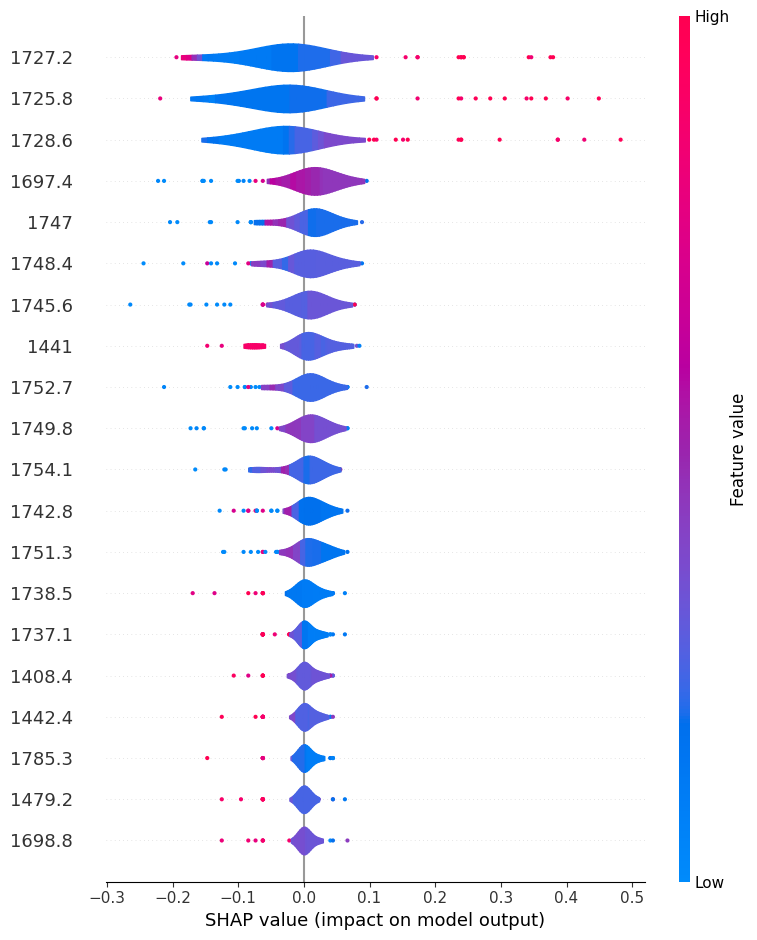

In [ ]:
#Salvar a figura em SVG
import matplotlib.pyplot as pl
shap.summary_plot(shap_values,plot_type='violin', show=False)
pl.savefig("shap_gbc.svg",dpi=700) #.png,.pdf will also support here

AttributeError: 'float' object has no attribute 'split'

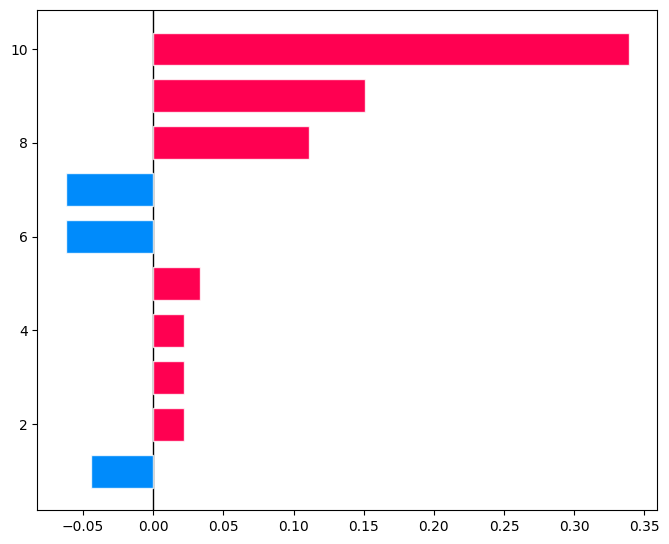

In [ ]:
# Construindo o gráfico de barra local para analise do efeito local de cada variável:
# Este gráfico nos mostra quais são os principais features que afetam a previsão de uma...
# única amostra (molêcula) e a magnitude do valor SHAP para cada feature.
shap.plots.bar(shap_values[0])

In [ ]:
# Construindo o gráfico de Waterfall PLOT
# O gráfico em cascata podemos ver como a soma de todos os valores SHAP é igual à diferença
# entre a previsão f(x) e o valor esperado E[f(x)].

shap.plots.waterfall(shap_values[0])


In [ ]:
# prompt: shap valus decision tree

explainer = shap.TreeExplainer(model_dt)
shap_values = explainer.shap_values(x_val)


In [ ]:
import numpy as np
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
# prompt: plot shap values decision tree violin

shap.summary_plot(shap_values)

In [ ]:
# Gráfico de resumo da importáncia das features: OPÇÃO 3
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
#Salvar a figura em SVG
import matplotlib.pyplot as pl
shap.summary_plot(shap_values,plot_type='violin', show=False)
pl.savefig("shap_gbc.svg",dpi=700) #.png,.pdf will also support here

# Conclusões sobre o modelo:

In [ ]:
### A metodologia SHAP value foi aplicada para entender as featuers importantes que impactam na atividade biologica (pIC50)
### A feature que mais contribuiram no aumento da atividade biológica foram:
### PubchemFP338(+0.09), PubchemFP13 (+0.08), PubchemFP143 (+0.06), PubchemFP579(+0.04), PubchemFP684(+0.04), PubchemFP377(+0.04)
### PubchemFP346(+0.04), PubchemFP637(+0.04), PubchemFP697(+0.04)
### Essas features são partes das molêculas (grupos funcionais) responsaveis pela tividade biológica contra HIV
### Uma análise de outros algorítmos de machine learning são necessários para validar essas features